# 银行营销

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 查看数据

In [2]:
data=pd.read_csv("./bank-additional/bank-additional-full.csv",sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

共有21个特征 包括数字型和字符型 总数41188 条

In [4]:
pd.set_option('display.max_columns',1000)  # 设置最多显示的列数  可以显示中间省略的数据
data.describe() # 只显示了数值列的信息

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


目前来看数据没有缺失

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


多项特征为无序分类特征 其中存在类别的unknown 的属性 为缺失值 需要做进一步处理

education 为有序分类特征

数值型变量数据跨度大 需做标准化与归一化处理

# 数据预处理

## 缺失值处理

查看缺失值

In [7]:
def checkUnknown(data):
    for i in data.columns:
        if type(data[i][0]) is str:
            print("unknown counts in %s:\t%s"%(i,str(data[data[i]=='unknown']['y'].count())))


checkUnknown(data) 

unknown counts in job:	330
unknown counts in marital:	80
unknown counts in education:	1731
unknown counts in default:	8597
unknown counts in housing:	990
unknown counts in loan:	990
unknown counts in contact:	0
unknown counts in month:	0
unknown counts in day_of_week:	0
unknown counts in poutcome:	0
unknown counts in y:	0


数值型特征值没有缺失的

缺失值中：
 1. job 和 merital 缺失较少 可以将其直接删除

 2. eduction 是有序的  所以对其做有序编码 转为数值型

 3. 其他 由于是分类类型的 不好拟合  所以 可以直接将unkown 抽取为一个特征  使用onehot 编码

删除缺失数据

In [8]:
numeric_attrs=[]
for i in data.columns:
  
    if type(data[i][0]) is str:
        if data[data[i]=='unknown']['y'].count()<500:
          data=data[data[i]!='unknown']
    else:
        numeric_attrs.append(i)
        
data.shape # 返回删除后的数据

(40787, 21)

有序分类特征值编码填充

In [10]:
def encode_edu(edu):
     values = ["unknown","illiterate", "basic.4y", "basic.6y", "basic.9y", 
               "high.school",  "professional.course", "university.degree"]
     levels=range(0,len(values)+1)
     dict_levels=dict(zip(values,levels))
     edu=edu.apply(lambda x:dict_levels[x] if x in values else x)
     return edu
data['education']=encode_edu(data['education'])
checkUnknown(data) 

unknown counts in job:	0
unknown counts in marital:	0
unknown counts in default:	8436
unknown counts in housing:	984
unknown counts in loan:	984
unknown counts in contact:	0
unknown counts in month:	0
unknown counts in day_of_week:	0
unknown counts in poutcome:	0
unknown counts in y:	0


目标分类数据二值化

yes=>0 no=>1

In [11]:
data.loc[data['y']=='yes','y']=0
data.loc[data['y']=='no','y']=1
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,2,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1
1,57,services,married,5,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1


无序分类特征值编码填充

onehot 编码

In [12]:
# onehot编码填充
data=pd.get_dummies(data)
print(data.columns.values)
print(data.shape)
data.head(2)

['age' 'education' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'marital_divorced'
 'marital_married' 'marital_single' 'default_no' 'default_unknown'
 'default_yes' 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no'
 'loan_unknown' 'loan_yes' 'contact_cellular' 'contact_telephone'
 'month_apr' 'month_aug' 'month_dec' 'month_jul' 'month_jun' 'month_mar'
 'month_may' 'month_nov' 'month_oct' 'month_sep' 'day_of_week_fri'
 'day_of_week_mon' 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed'
 'poutcome_failure' 'poutcome_nonexistent' 'poutcome_success']
(40787, 55)


,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,5,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## 无量纲化(特征规范化)

数据标准化

In [13]:
# 标准化
from sklearn.preprocessing import StandardScaler
for i in numeric_attrs:
    scaler=StandardScaler()
    data[i]=scaler.fit_transform(data[i].values.reshape(-1,1))
data.head(2)

/Users/crq/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.540198,2,0.010299,-0.565778,0.19472,-0.349341,0.649306,0.724561,0.88956,0.713487,0.33202,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1.636333,5,-0.421689,-0.565778,0.19472,-0.349341,0.649306,0.724561,0.88956,0.713487,0.33202,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## 特征工程

由于数据只有21个特征值 数目不是很大  所以在模型训练时不会因为特征值过大造成模型训练慢的结果

因此这里不再对特征进行筛选


## 数据切分

In [14]:
#数据切分成测试集与训练集  然后进行过采样 过采样完成后 调用模型
from sklearn.model_selection import train_test_split
# 切分数据集 测试集占20%  random_state 随机种子可以随意指定
# stratify 根据与分层
X=data[
    ['age','education','duration','campaign','pdays','previous','emp.var.rate',
 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed',
 'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
 'job_management','job_retired','job_self-employed','job_services',
 'job_student','job_technician','job_unemployed','marital_divorced',
 'marital_married','marital_single','default_no','default_unknown',
 'default_yes','housing_no','housing_unknown','housing_yes','loan_no',
 'loan_unknown','loan_yes','contact_cellular','contact_telephone',
 'month_apr','month_aug','month_dec','month_jul','month_jun','month_mar',
 'month_may','month_nov','month_oct','month_sep','day_of_week_fri',
 'day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed',
 'poutcome_failure','poutcome_nonexistent','poutcome_success'
    ]]
data['y'].head(1)
y=data['y']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

## 正负样本均衡
###过采样和欠采样

查看正负样本个数

In [15]:
yes=data[data['y']==0]['y'].count()
no=data[data['y']==1]['y'].count()
print("yes:",yes,"no:  ",no)

yes: 4594 no:   36193


正样本明显少于负样本

###使用过采样 处理数据

由于欠采样是删除多余负样本，有可能会删除掉某些重要数据 对模型结果造成影响

对于分类一般会采用过采样方式

In [16]:
def upData(x_data,y_data):
    # SMOTE 算法,使用imblearn中的over_sampling.SMOTE
    from imblearn.over_sampling import SMOTE
    # 建立SMOTE对象
    oversampler = SMOTE(random_state=0)
    # 生成数据，使得正负样本平衡
    x_data, y_data = oversampler.fit_sample(x_data, y_data)
    # 返回生成后的数据
    return (x_data, y_data)

In [18]:
x_data, y_data = upData(x_train, y_train)

#模型建立
## 逻辑回归、svm  决策树 和 随机森林





In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
    f1_score,log_loss,recall_score,\
    precision_score,roc_auc_score,classification_report

In [20]:
# 各个模型效果
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.svm import LinearSVC # 支持向量机
from sklearn.tree import DecisionTreeClassifier  # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
import time

# 模型及模型参数列表

clfs=[LogisticRegression(),LinearSVC(),DecisionTreeClassifier(),RandomForestClassifier()]
i=0
#model_score={"LogicRegression":0,"SVM":0,"DecisionTree":0,"RandomForest":0}
model_score=[]
# 输出模型及参数信息，以及模型分类准确性
for model in clfs:
    print("==============================")
    start_time=time.time()
    model.fit(x_train,y_train)
    end_time=time.time()
    print('It took %d seconds to train the model!' %(end_time-start_time))
    print()
    print("模型及模型参数：")
    print(str(model))
    
    
    y_pred=model.predict(x_test)
    print("模型评估：")
    
    print("F1 score:",f1_score(y_test,y_pred))
    print("Recall:",recall_score(y_test,y_pred))
    print("Precision:",precision_score(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred))
    
    #temp_score=model.score(x_test,y_test)
    #print("score:",temp_score)
    
    #model_score.append(temp_score)
    model_score.append(f1_score(y_test,y_pred))
print("model_score：",model_score)

/Users/crq/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


It took 0 seconds to train the model!

模型及模型参数：
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
模型评估：
F1 score: 0.9499325236167342
Recall: 0.9723718745683105
Precision: 0.9285054742118454
Accuracy: 0.9090463348860015


It took 4 seconds to train the model!

模型及模型参数：
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
模型评估：
F1 score: 0.9497379384491331
Recall: 0.9762398121287471
Precision: 0.9246369226743425
Accuracy: 0.9083108605050257
It took 0 seconds to train the model!

模型及模型参数：
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


模型评估：
F1 score: 0.9402324294410624
Recall: 0.9388037021688078
Precision: 0.9416655119855896
Accuracy: 0.894091689139495


It took 0 seconds to train the model!

模型及模型参数：
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
模型评估：
F1 score: 0.9461209866335952
Recall: 0.9484735460698992
Precision: 0.9437800687285224
Accuracy: 0.9041431723461633
model_score： [0.9499325236167342, 0.9497379384491331, 0.9402324294410624, 0.9461209866335952]


各模型得分均在0.90 左右 模型训练效果较好

# 结果可视化
使用条形图显示模型评估结果


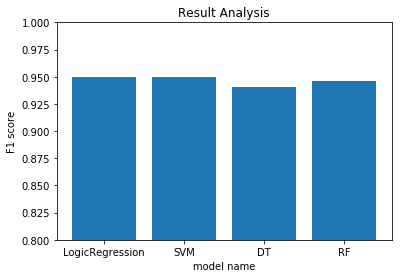

[0.9499325236167342, 0.9497379384491331, 0.9402324294410624, 0.9461209866335952]


In [21]:
import matplotlib.pyplot as plt
 
name_list = ['LogicRegression','SVM','DT','RF']
plt.title('Result Analysis')
plt.bar(range(len(model_score)), model_score,tick_label=name_list)
#plt.ylabel('accuracy')
plt.ylabel('F1 score')
plt.xlabel('model name')
plt.ylim(0.8,1) # 设置y轴范围为0.8 到 1
plt.show()
print(model_score)

# 总结

模型训练效果良好  

本次尚未进行模型调参操作